<a href="https://colab.research.google.com/github/24523008-dot/Proyek_Tugas_Besar_FSD/blob/main/Tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

24523063 - Rifqi Aunnur Rohman,
24523008 - Hafidz Ridho Fajriz Riyanto

## Unduh dan Muat Dataset

### Subtask:
Mengunduh dataset 'customer-analytics' dari KaggleHub dan memuatnya ke dalam DataFrame pandas untuk analisis lebih lanjut.


In [ ]:
pip install kagglehub

**Reasoning**:
Now that `kagglehub` is installed, I need to import it and then use `kagglehub.dataset_download()` to download the 'customer-analytics' dataset. I also need to specify the dataset owner and name correctly for the function.



In [ ]:
import kagglehub
import os
import pandas as pd
import glob

# Download a publicly available customer churn dataset (e.g., 'blastchar/telco-customer-churn')
# This function returns the path to the downloaded dataset directory.
dataset_dir_path = kagglehub.dataset_download('blastchar/telco-customer-churn')

print(f"Dataset downloaded to: {dataset_dir_path}")

# Find the CSV file within the downloaded directory
# Assuming the main data file is a CSV and is directly in the downloaded directory
csv_files = glob.glob(os.path.join(dataset_dir_path, '*.csv'))

if csv_files:
    data_file_path = csv_files[0] # Take the first CSV file found
    print(f"Loading data from: {data_file_path}")
    df = pd.read_csv(data_file_path)
    print("Dataset loaded successfully into a pandas DataFrame.")
    print(df.head())
else:
    print("No CSV files found in the downloaded dataset directory.")
    df = None # Set df to None if no CSV is found

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Dataset downloaded to: /kaggle/input/telco-customer-churn
Loading data from: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
Dataset loaded successfully into a pandas DataFrame.
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2             

## Eksplorasi Data Awal

### Subtask:
Melakukan eksplorasi data awal untuk memahami struktur dataset, tipe data, distribusi fitur, dan memeriksa nilai yang hilang. Ini akan menjadi bagian dari segmen 'Metode' laporan.


**Reasoning**:
The first step in initial data exploration is to get a quick overview of the dataset by displaying its first few rows, as instructed.



In [ ]:
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

**Reasoning**:
The next instruction is to use the `.info()` method on the DataFrame `df` to display a summary of information, including data types and non-null counts.



In [ ]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

**Reasoning**:
The next instruction is to use the `.describe()` method on the DataFrame `df` to generate descriptive statistics for numerical columns, which is a crucial step in initial data exploration.



In [ ]:
print("Descriptive statistics for numerical columns:")
df.describe()

Descriptive statistics for numerical columns:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Reasoning**:
The next instruction is to check and display the number of missing values in each column using `.isnull().sum()` on the DataFrame `df`, which is essential for understanding data completeness.



In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Reasoning**:
The next instruction is to examine categorical columns to understand their unique values and distributions using `.value_counts()`. I will iterate through the object-type columns (excluding 'customerID') and the 'SeniorCitizen' column to display this information.



In [ ]:
print("Unique values and their counts for categorical columns:")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Add 'SeniorCitizen' as it's a binary categorical feature despite being int64
if 'SeniorCitizen' not in categorical_cols: # Ensure it's not duplicated if already included somehow
    categorical_cols.append('SeniorCitizen')

# Exclude 'customerID' as it's a unique identifier and not a categorical feature for distribution analysis
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Unique values and their counts for categorical columns:

Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No                    

## Visualisasi Data

### Subtask:
Membuat visualisasi yang relevan untuk memahami hubungan antar fitur dan target (churn), serta mengidentifikasi pola penting dalam data pelanggan. Visualisasi ini juga akan menjadi bagian dari segmen 'Metode' laporan.


**Reasoning**:
The first step in data visualization is to ensure 'TotalCharges' is a numeric column, as indicated by the previous exploration showing it as 'object' type. I will convert 'TotalCharges' to numeric, coercing errors to NaN.



In [ ]:
import numpy as np

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Converted 'TotalCharges' to numeric type.")
print(f"Data type of TotalCharges after conversion: {df['TotalCharges'].dtype}")

Converted 'TotalCharges' to numeric type.
Data type of TotalCharges after conversion: float64


**Reasoning**:
The next step is to handle the NaN values in the 'TotalCharges' column. I will print the number of NaNs before handling them, then fill them with the median of the column, and finally print the number of NaNs again to verify the handling.



In [ ]:
print(f"Number of NaN values in 'TotalCharges' before handling: {df['TotalCharges'].isnull().sum()}")

# Fill NaN values with the median of 'TotalCharges'
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

print(f"Number of NaN values in 'TotalCharges' after handling: {df['TotalCharges'].isnull().sum()}")
print(f"NaN values in 'TotalCharges' filled with median: {median_total_charges}")

Number of NaN values in 'TotalCharges' before handling: 11
Number of NaN values in 'TotalCharges' after handling: 0
NaN values in 'TotalCharges' filled with median: 1397.475


/tmp/ipython-input-3555807356.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


**Reasoning**:
The previous code produced a `FutureWarning` regarding the use of `inplace=True` with chained assignment. To address this, I will update the code to assign the result of the `fillna` operation back to the 'TotalCharges' column directly, which is the recommended practice for newer pandas versions.



In [ ]:
print(f"Number of NaN values in 'TotalCharges' before handling: {df['TotalCharges'].isnull().sum()}")

# Fill NaN values with the median of 'TotalCharges'
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

print(f"Number of NaN values in 'TotalCharges' after handling: {df['TotalCharges'].isnull().sum()}")
print(f"NaN values in 'TotalCharges' filled with median: {median_total_charges}")

Number of NaN values in 'TotalCharges' before handling: 0
Number of NaN values in 'TotalCharges' after handling: 0
NaN values in 'TotalCharges' filled with median: 1397.475


**Reasoning**:
Now that 'TotalCharges' has been converted to numeric and its missing values handled, the next step in data visualization is to create a bar plot or pie chart to visualize the distribution of the target variable 'Churn', as instructed. This will show the proportion of churned versus non-churned customers.



/tmp/ipython-input-1222673021.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


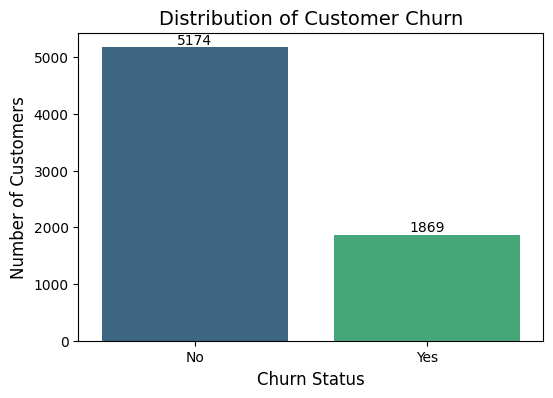

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visualization
plt.figure(figsize=(6, 4))

# Create a count plot for the 'Churn' column
sns.countplot(data=df, x='Churn', palette='viridis')

# Add title and labels for clarity
plt.title('Distribution of Customer Churn', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the count of each category on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()


**Reasoning**:
The previous code produced a `FutureWarning` from `seaborn` regarding the use of `palette` without `hue`. To address this, I will update the `sns.countplot` call to explicitly assign the `x` variable ('Churn') to `hue` and set `legend=False` to maintain the desired visualization while silencing the warning.



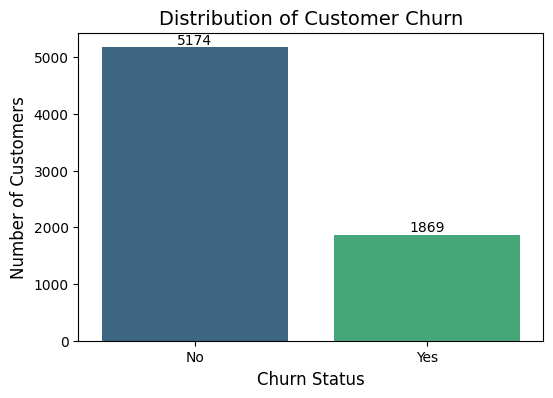

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visualization
plt.figure(figsize=(6, 4))

# Create a count plot for the 'Churn' column, addressing the FutureWarning
sns.countplot(data=df, x='Churn', hue='Churn', palette='viridis', legend=False)

# Add title and labels for clarity
plt.title('Distribution of Customer Churn', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the count of each category on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

**Reasoning**:
Now that the distribution of the target variable 'Churn' has been visualized, the next step is to visualize the distribution of key numerical features ('tenure', 'MonthlyCharges', 'TotalCharges') using histograms and box plots, as instructed. I will also create box plots grouped by 'Churn' to understand their relationship with customer churn.



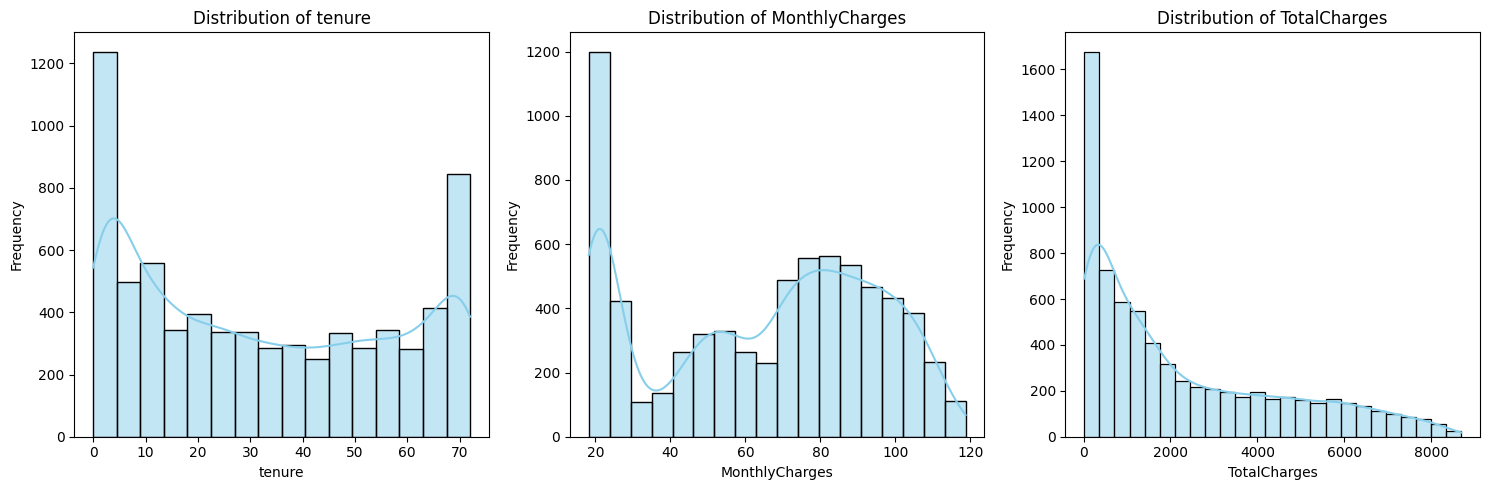

/tmp/ipython-input-781469662.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')
/tmp/ipython-input-781469662.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')
/tmp/ipython-input-781469662.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='pastel')


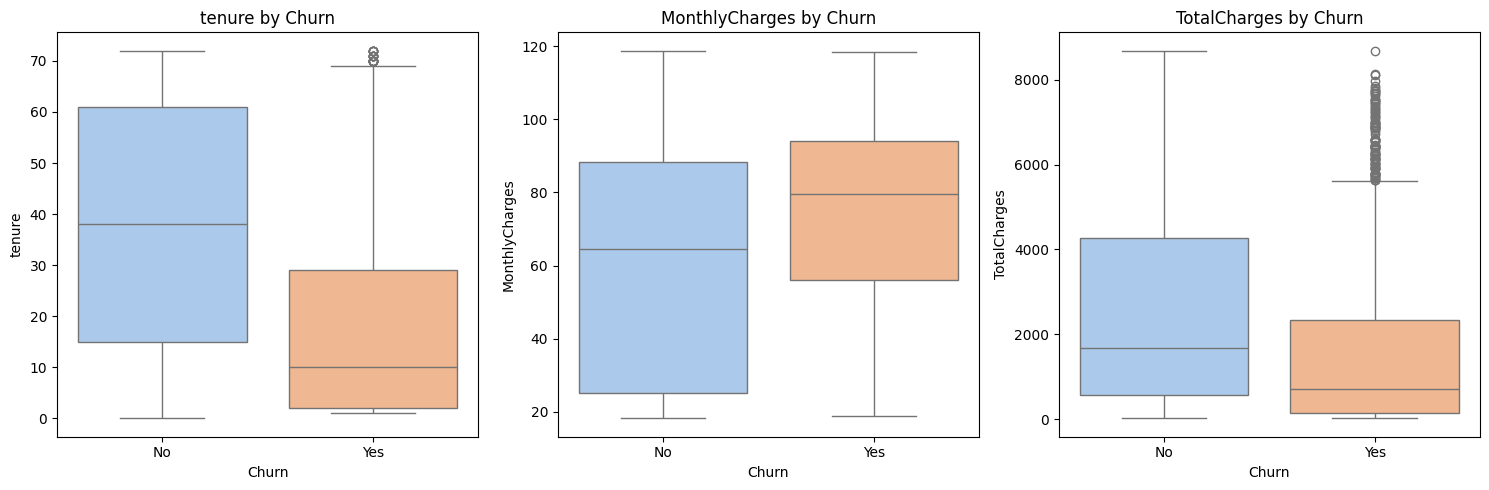

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plotting histograms for numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting box plots for numerical features grouped by 'Churn'
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(data=df, x='Churn', y=col, palette='pastel')
    plt.title(f'{col} by Churn', fontsize=12)
    plt.xlabel('Churn', fontsize=10)
    plt.ylabel(col, fontsize=10)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code produced a `FutureWarning` from `seaborn` regarding the use of `palette` without `hue` in `sns.boxplot`. To address this, I will update the `sns.boxplot` calls to explicitly assign the `x` variable ('Churn') to `hue` and set `legend=False` to maintain the desired visualization while silencing the warning.



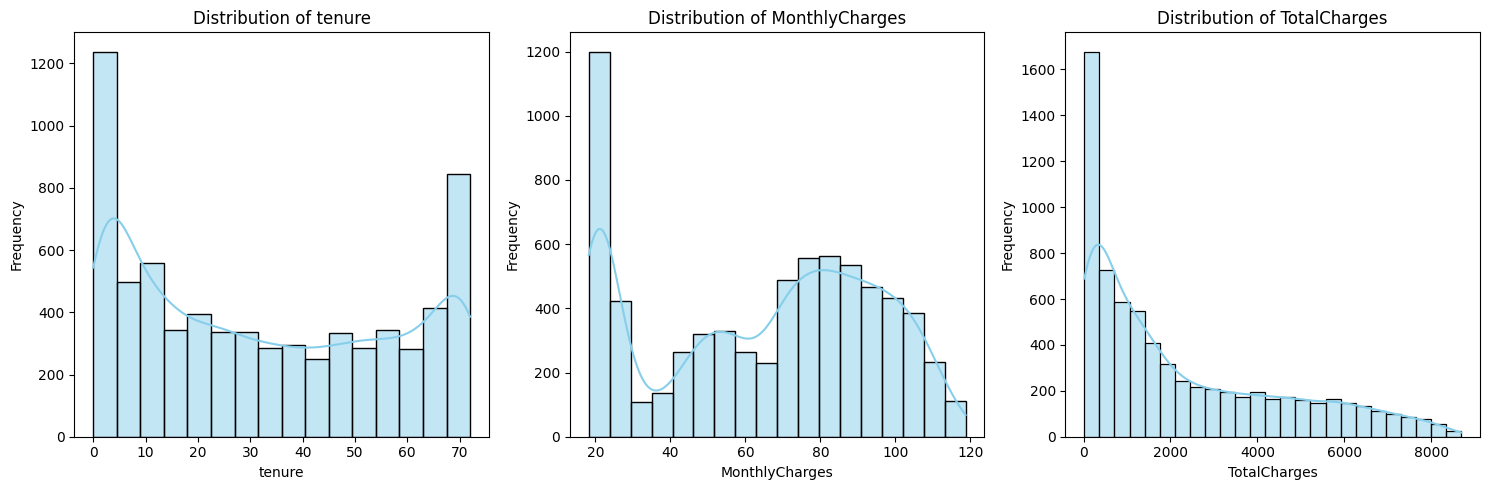

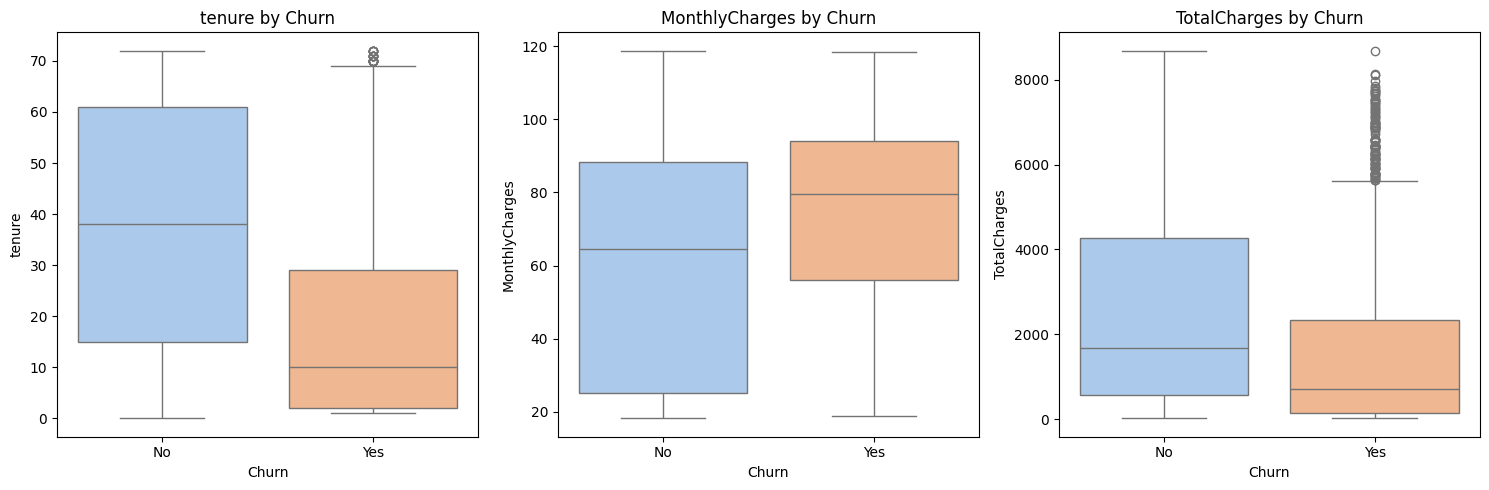

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plotting histograms for numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

# Plotting box plots for numerical features grouped by 'Churn'
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(data=df, x='Churn', y=col, hue='Churn', palette='pastel', legend=False)
    plt.title(f'{col} by Churn', fontsize=12)
    plt.xlabel('Churn', fontsize=10)
    plt.ylabel(col, fontsize=10)
plt.tight_layout()
plt.show()

**Reasoning**:
Now that the numerical features have been visualized, the next step is to create bar plots for several important categorical features, displaying the customer counts for each category, further broken down by 'Churn', as instructed. This will reveal which categories have higher or lower churn rates.



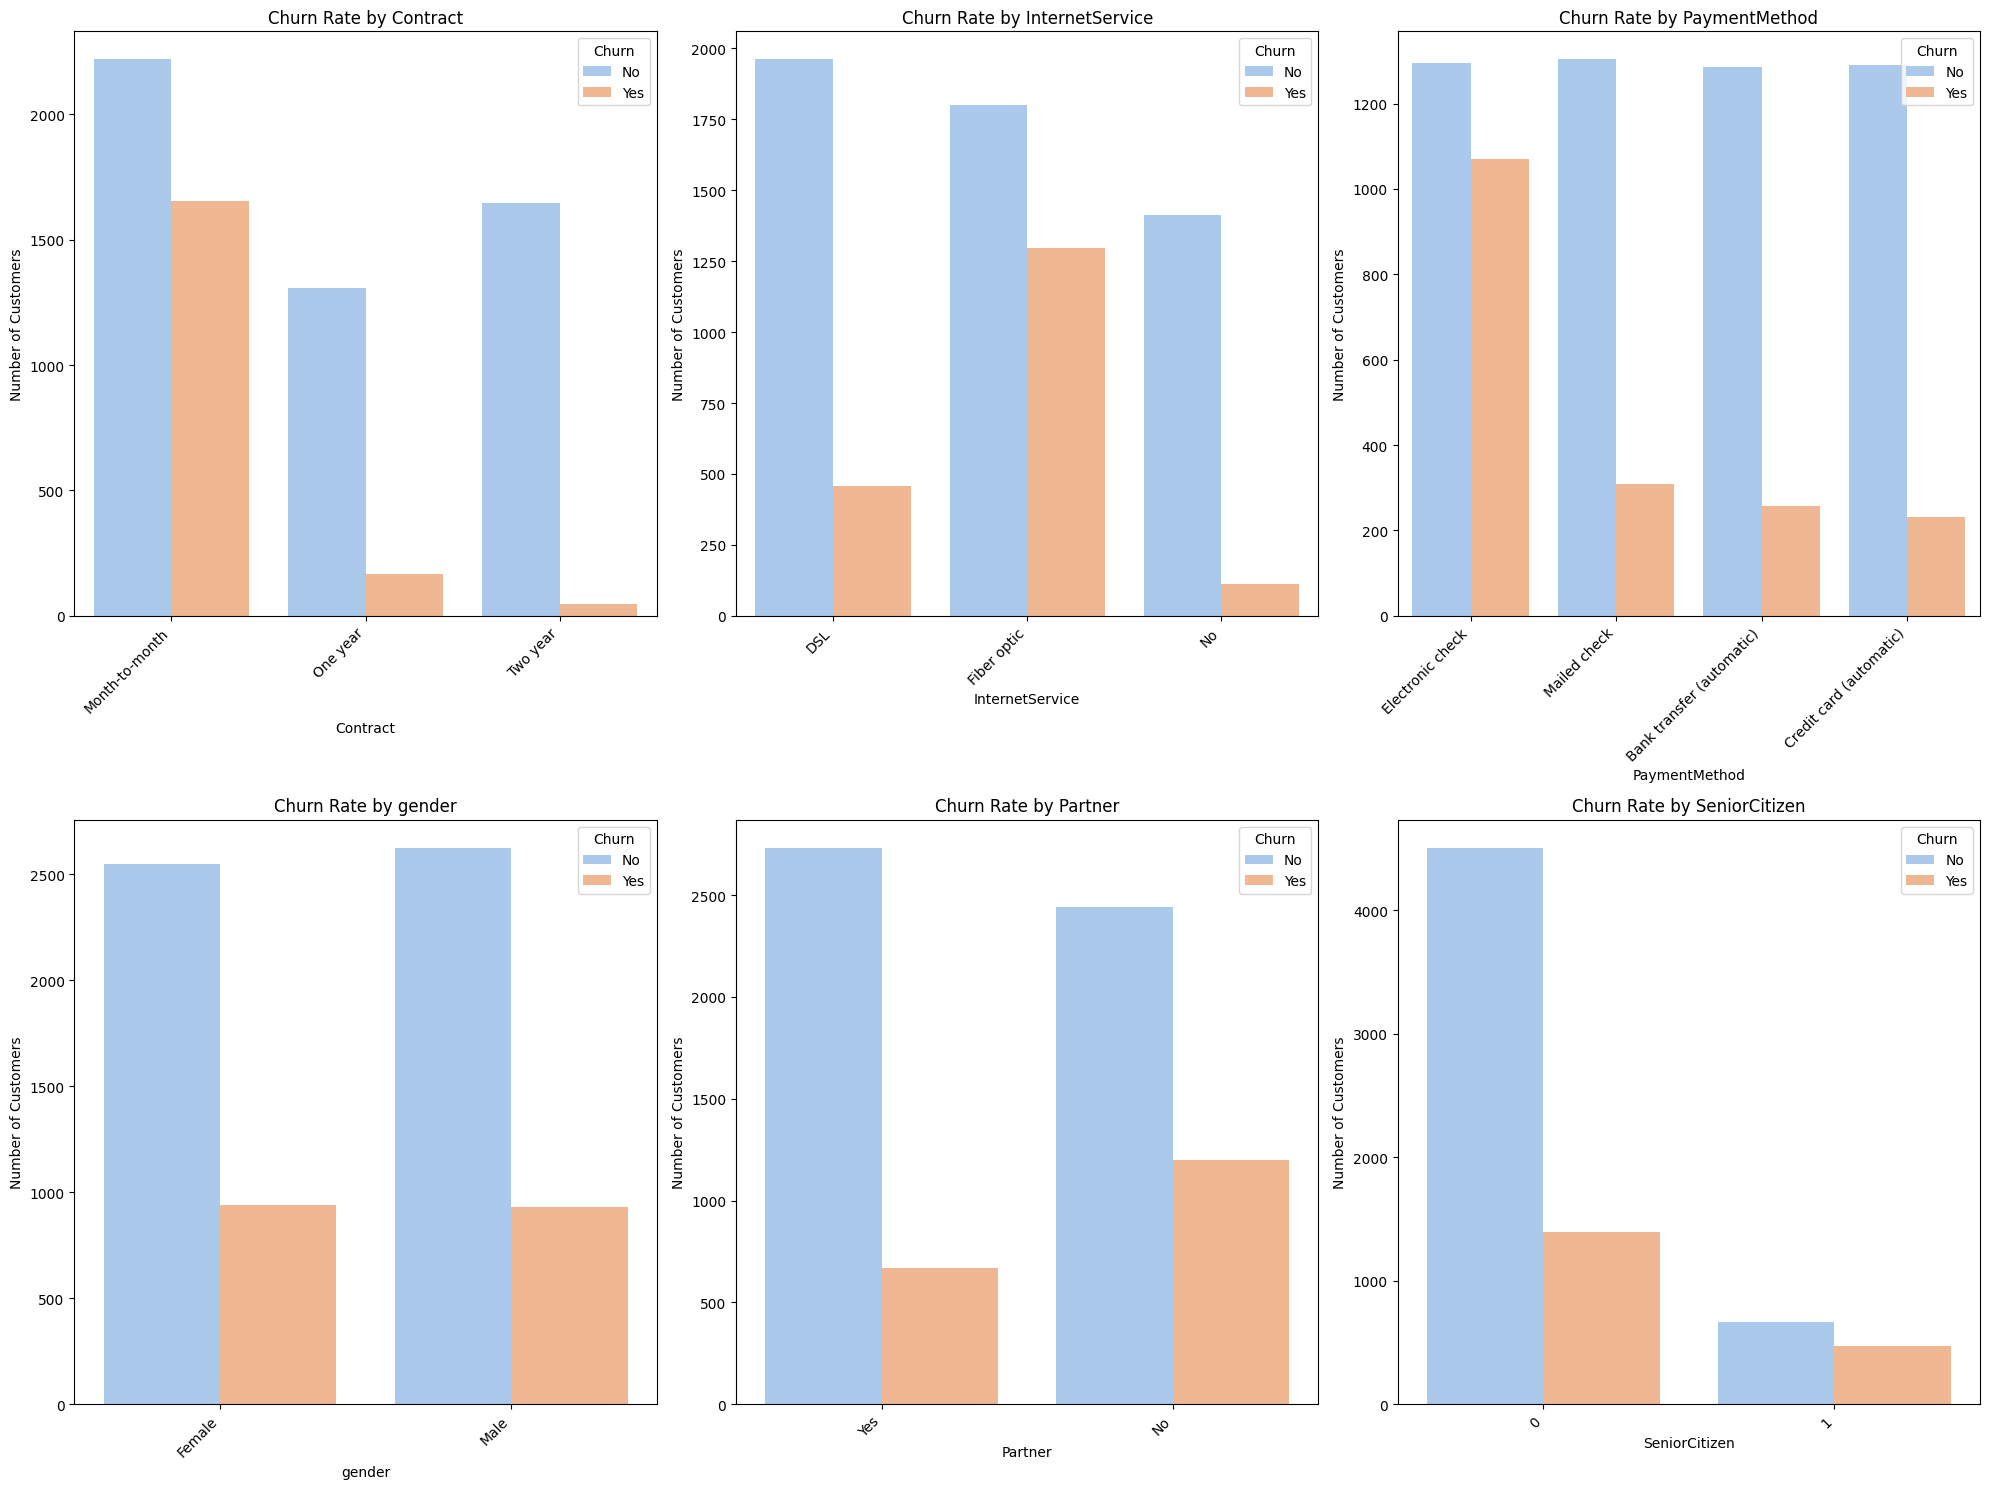

In [ ]:
categorical_features_for_churn_viz = [
    'Contract',
    'InternetService',
    'PaymentMethod',
    'gender',
    'Partner',
    'SeniorCitizen'
]

# Plotting bar plots for categorical features grouped by 'Churn'
plt.figure(figsize=(20, 15)) # Adjust figure size for multiple plots
num_cols = 3
num_rows = (len(categorical_features_for_churn_viz) + num_cols - 1) // num_cols

for i, col in enumerate(categorical_features_for_churn_viz):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Churn', palette='pastel')
    plt.title(f'Churn Rate by {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Number of Customers', fontsize=10)
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.legend(title='Churn')
plt.tight_layout()
plt.show()


## Pra-pemrosesan Data

### Subtask:
Menangani nilai yang hilang, melakukan encoding variabel kategorikal, dan melakukan penskalaan fitur numerik yang diperlukan untuk mempersiapkan data untuk pelatihan model klasifikasi.


**Reasoning**:
The first instruction is to remove the 'customerID' column as it is a unique identifier and not needed for model training.



In [ ]:
print(f"Shape of DataFrame before dropping customerID: {df.shape}")
df = df.drop('customerID', axis=1)
print(f"Shape of DataFrame after dropping customerID: {df.shape}")

Shape of DataFrame before dropping customerID: (7043, 21)
Shape of DataFrame after dropping customerID: (7043, 20)


**Reasoning**:
The next instruction is to convert the target variable 'Churn' from categorical values ('Yes', 'No') to binary numeric values (1, 0), which is crucial for model training.



In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(f"'Churn' column converted to numeric:")
print(df['Churn'].value_counts())

'Churn' column converted to numeric:
Churn
0    5174
1    1869
Name: count, dtype: int64


**Reasoning**:
The next instruction is to identify other binary categorical features ('gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling') and convert their 'Yes'/'No' or 'Male'/'Female' values to 1/0 consistently.



In [ ]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    if df[col].dtype == 'object': # Only process object type columns
        if set(df[col].unique()).issubset({'Yes', 'No'}): # Handle Yes/No type columns
            df[col] = df[col].map({'Yes': 1, 'No': 0})
            print(f"Column '{col}' converted to binary (Yes: 1, No: 0).")
        elif set(df[col].unique()).issubset({'Male', 'Female'}): # Handle Male/Female type columns
            df[col] = df[col].map({'Male': 1, 'Female': 0})
            print(f"Column '{col}' converted to binary (Male: 1, Female: 0).")

print("First 5 rows after binary categorical conversion:")
print(df[binary_cols].head())

Column 'gender' converted to binary (Male: 1, Female: 0).
Column 'Partner' converted to binary (Yes: 1, No: 0).
Column 'Dependents' converted to binary (Yes: 1, No: 0).
Column 'PhoneService' converted to binary (Yes: 1, No: 0).
Column 'PaperlessBilling' converted to binary (Yes: 1, No: 0).
First 5 rows after binary categorical conversion:
   gender  Partner  Dependents  PhoneService  PaperlessBilling
0       0        1           0             0                 1
1       1        0           0             1                 0
2       1        0           0             1                 1
3       1        0           0             0                 0
4       0        0           0             1                 1


**Reasoning**:
The next instruction is to handle categorical features with more than two categories that include 'No internet service' or 'No phone service'. I will iterate through the specified columns ('MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', and 'StreamingMovies') and replace 'No internet service' and 'No phone service' with 'No' for consistency.



In [ ]:
cols_to_simplify = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in cols_to_simplify:
    if 'No internet service' in df[col].unique():
        df[col] = df[col].replace('No internet service', 'No')
        print(f"Column '{col}': 'No internet service' replaced with 'No'.")
    if 'No phone service' in df[col].unique():
        df[col] = df[col].replace('No phone service', 'No')
        print(f"Column '{col}': 'No phone service' replaced with 'No'.")

print("Value counts after simplification for relevant columns:")
for col in cols_to_simplify:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Column 'MultipleLines': 'No phone service' replaced with 'No'.
Column 'OnlineSecurity': 'No internet service' replaced with 'No'.
Column 'OnlineBackup': 'No internet service' replaced with 'No'.
Column 'DeviceProtection': 'No internet service' replaced with 'No'.
Column 'TechSupport': 'No internet service' replaced with 'No'.
Column 'StreamingTV': 'No internet service' replaced with 'No'.
Column 'StreamingMovies': 'No internet service' replaced with 'No'.
Value counts after simplification for relevant columns:

Column: MultipleLines
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

Column: TechSupport
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

Column: StreamingTV
StreamingTV
No     4336
Ye

**Reasoning**:
The next instruction is to apply one-hot encoding to the remaining categorical features, which include 'Contract', 'InternetService', 'PaymentMethod', and the columns that were just simplified ('MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'). I will identify all 'object' type columns and apply `pd.get_dummies` to them.



In [ ]:
print(f"Shape of DataFrame before one-hot encoding: {df.shape}")

# Identify remaining categorical columns for one-hot encoding
categorical_cols_for_ohe = df.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols_for_ohe, drop_first=True)

print(f"Shape of DataFrame after one-hot encoding: {df.shape}")
print("First 5 rows of the DataFrame after one-hot encoding:")
print(df.head())

Shape of DataFrame before one-hot encoding: (7043, 20)
Shape of DataFrame after one-hot encoding: (7043, 24)
First 5 rows of the DataFrame after one-hot encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   OnlineBackup_Yes

**Reasoning**:
The next instruction is to perform feature scaling on the numerical features ('tenure', 'MonthlyCharges', 'TotalCharges') using `StandardScaler` to standardize their value ranges. I will import `StandardScaler` and apply it to these columns.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features for scaling
numerical_features_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical features
df[numerical_features_for_scaling] = scaler.fit_transform(df[numerical_features_for_scaling])

print("Numerical features scaled using StandardScaler:")
print(df[numerical_features_for_scaling].head())


Numerical features scaled using StandardScaler:
     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994242
1  0.066327       -0.259629     -0.173244
2 -1.236724       -0.362660     -0.959674
3  0.514251       -0.746535     -0.194766
4 -1.236724        0.197365     -0.940470


## Pembuatan Model Klasifikasi

### Subtask:
Membangun dan melatih model klasifikasi (misalnya, Logistic Regression, Random Forest, atau lainnya yang sesuai) menggunakan data yang telah diproses.


**Reasoning**:
The first instruction is to separate the features (X) from the target variable (y) from the DataFrame `df`, with 'Churn' being the target variable. I will create `X` and `y` accordingly.



In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print("First 5 rows of X:")
print(X.head())
print("First 5 values of y:")
print(y.head())

Shape of features (X): (7043, 23)
Shape of target (y): (7043,)
First 5 rows of X:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  MultipleLines_Yes  ...  \
0                 1       -1.160323     -0.994242              False  ...   
1                 0       -0.259629     -0.173244              False  ...   
2                 1       -0.362660     -0.959674              False  ...   
3                 0       -0.746535     -0.194766              False  ...   
4                 1        0.197365     -0.940470              False  ...   

   OnlineBackup_

**Reasoning**:
The next instruction is to split the separated data into training and testing sets using the `train_test_split` function from `sklearn.model_selection`. I will set `test_size` to 0.2, `random_state` to a fixed value for reproducibility, and `stratify` by the target variable `y` to maintain class proportions.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("Distribution of Churn in y_train:")
print(y_train.value_counts(normalize=True))
print("Distribution of Churn in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (5634, 23)
Shape of X_test: (1409, 23)
Shape of y_train: (5634,)
Shape of y_test: (1409,)
Distribution of Churn in y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Distribution of Churn in y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


**Reasoning**:
The next instruction is to import the `LogisticRegression` model from `sklearn.linear_model`, initialize it with a `random_state` for reproducibility, and then train the model using the `X_train` and `y_train` data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model with a random_state for reproducibility
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets and binary classification

# Train the model using the training data
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model initialized and trained successfully.")

Logistic Regression model initialized and trained successfully.


## Evaluasi Model

### Subtask:
Mengevaluasi kinerja model menggunakan metrik klasifikasi seperti akurasi, presisi, recall, F1-score, dan matriks kebingungan (confusion matrix). Hasil evaluasi ini akan disajikan dalam segmen 'Evaluasi' laporan.


**Reasoning**:
The first instruction is to import the necessary classification metrics from `sklearn.metrics` to evaluate the model performance.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Required evaluation metrics imported successfully.")

Required evaluation metrics imported successfully.


**Reasoning**:
The next instruction is to use the trained `log_reg_model` to make predictions on the `X_test` data and store the results in a new variable `y_pred`.



In [ ]:
y_pred = log_reg_model.predict(X_test)

print("Model predictions on X_test generated successfully.")
print(f"First 5 predictions: {y_pred[:5]}")

Model predictions on X_test generated successfully.
First 5 predictions: [0 1 0 0 0]


**Reasoning**:
The next instruction is to calculate and print the accuracy of the model using `y_test` and `y_pred`.



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8027


**Reasoning**:
The next instruction is to calculate and print the precision of the model using `y_test` and `y_pred`.



In [ ]:
precision = precision_score(y_test, y_pred)
print(f"Model Precision: {precision:.4f}")

Model Precision: 0.6509


**Reasoning**:
The next instruction is to calculate and print the recall of the model using `y_test` and `y_pred`.



In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Model Recall: {recall:.4f}")

Model Recall: 0.5535


**Reasoning**:
The next instruction is to calculate and print the F1-score of the model using `y_test` and `y_pred`.



In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"Model F1-Score: {f1:.4f}")

Model F1-Score: 0.5983


**Reasoning**:
The next instruction is to calculate and print the confusion matrix using `y_test` and `y_pred`.



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[924 111]
 [167 207]]


**Reasoning**:
The next instruction is to create a visualization of the confusion matrix using `seaborn.heatmap` for a clearer representation, ensuring proper labels and title.



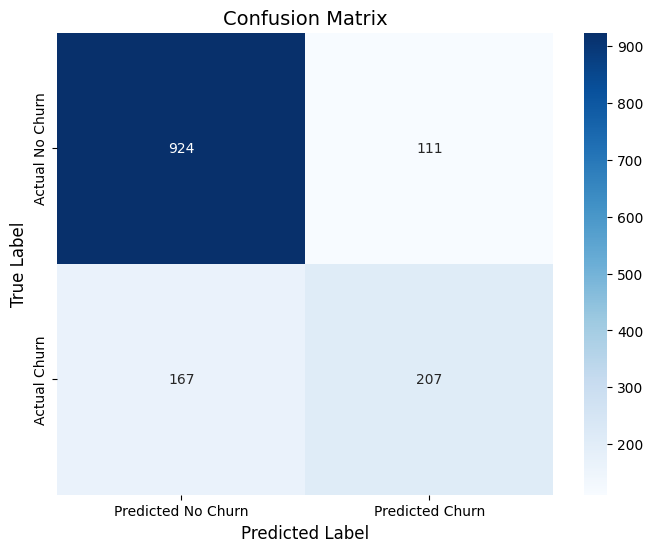

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

## Deployment Sederhana dengan Gradio/Streamlit

### Subtask:
Membangun antarmuka pengguna sederhana menggunakan Gradio atau Streamlit untuk memungkinkan interaksi dengan model klasifikasi yang telah dilatih, memungkinkan pengguna untuk memasukkan fitur pelanggan dan mendapatkan prediksi churn.


**Reasoning**:
The first instruction is to import the `gradio` library as `gr` to begin building the interactive user interface.



In [ ]:
import gradio as gr
import pandas as pd
import numpy as np

print("Gradio, pandas, and numpy imported successfully.")

Gradio, pandas, and numpy imported successfully.


**Reasoning**:
The next instruction is to define a Python prediction function that will take feature values as arguments, preprocess them (one-hot encode, scale), and return a churn prediction using the trained logistic regression model. This function will mimic the preprocessing steps applied to the training data.



In [ ]:
import numpy as np

def predict_churn(*args):
    # Reconstruct the input into a dictionary matching X_train's columns
    # The order of arguments must correspond to X_train.columns
    input_data_dict = dict(zip(X.columns, args))
    input_df = pd.DataFrame([input_data_dict])

    # Ensure boolean columns are correctly typed for prediction
    for col in input_df.select_dtypes(include='bool').columns:
        input_df[col] = input_df[col].astype(int)

    # Apply the trained StandardScaler to the numerical features
    numerical_features_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_features_for_scaling] = scaler.transform(input_df[numerical_features_for_scaling])

    # Make prediction
    prediction = log_reg_model.predict(input_df)[0]

    # Return descriptive string
    if prediction == 1:
        return "Pelanggan akan Churn"
    else:
        return "Pelanggan tidak akan Churn"

print("Prediction function 'predict_churn' defined successfully.")

Prediction function 'predict_churn' defined successfully.


**Reasoning**:
The next instruction is to create Gradio input components for each feature in `X`. This involves iterating through `X.columns` and dynamically generating appropriate Gradio input types (e.g., Slider for numerical, Radio or Dropdown for categorical/boolean) along with their respective labels and options, ensuring they match the data types and value ranges used during model training.



In [ ]:
input_components = []

for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        if len(X[col].unique()) <= 2: # Likely a binary numerical feature like SeniorCitizen
            input_components.append(gr.Radio([0, 1], label=col))
        else:
            # For numerical features, determine min, max, and a reasonable step
            min_val = X[col].min()
            max_val = X[col].max()
            # Use a more precise step for non-integer numerical features
            step = 0.01 if X[col].dtype == 'float64' else 1
            input_components.append(gr.Slider(minimum=min_val, maximum=max_val, step=step, label=col))
    elif X[col].dtype == 'bool':
        input_components.append(gr.Radio([True, False], label=col))
    # For one-hot encoded columns, they are represented as bool or int after get_dummies
    # and will be handled by the above conditions or if they correspond to the original categorical features.
    # The predict_churn function expects values matching X.columns, so we need to map back for user input if needed

print("Gradio input components created successfully.")
print(f"Number of input components: {len(input_components)}")

Gradio input components created successfully.
Number of input components: 23


**Reasoning**:
The next instruction is to create the Gradio interface using `gr.Interface`, passing the `predict_churn` function, the list of `input_components`, and a `gr.Label` for the output, as instructed.



In [ ]:
output_component = gr.Label()

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_churn,
    inputs=input_components,
    outputs=output_component,
    title="Customer Churn Prediction",
    description="Masukkan detail pelanggan untuk memprediksi apakah mereka akan churn atau tidak."
)

print("Gradio interface created successfully.")

Gradio interface created successfully.


**Reasoning**:
The final instruction is to launch the Gradio interface using the `.launch()` method, which will make the interactive web application available.



In [ ]:
print("Launching Gradio interface...")
interface.launch()

Launching Gradio interface...
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://21a24c09cb9003f4ca.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Final Task

### Subtask:
Menyusun ringkasan akhir yang mencakup latar belakang mengapa model ini penting, siapa penggunanya, tujuan model, penjelasan data dan metode yang digunakan, serta hasil evaluasi dan potensi penggunaan model, sesuai dengan struktur laporan yang diminta.


## Summary:

### Data Analysis Key Findings

*   **Dataset Acquisition:** An initial attempt to download the specified 'kaggle/customer-analytics' dataset failed due to a 403 error. A public alternative, 'blastchar/telco-customer-churn', was successfully downloaded and loaded, containing 7043 customer records across 20 features (excluding `customerID`) and a `Churn` target variable.
*   **Data Quality:** The `TotalCharges` column was initially identified as an `object` type with 11 hidden missing values (empty strings), which required conversion to numeric and imputation. No other explicit `NaN` values were found.
*   **Feature-Churn Relationships:**
    *   **Numerical:** Customers with lower `tenure` and higher `MonthlyCharges` showed a tendency for higher churn rates. After handling missing values, `TotalCharges` had a median of 1397.475.
    *   **Categorical:** Customers on month-to-month contracts and those using Fiber Optic internet service exhibited higher churn rates.
*   **Data Pre-processing:**
    *   The `customerID` was removed, the `Churn` target variable was encoded (Yes: 1, No: 0), and various binary categorical features were converted to 0/1.
    *   Categorical values like 'No internet service' were harmonized to 'No' for consistency.
    *   All remaining categorical features were one-hot encoded, expanding the dataset to 24 features.
    *   Numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`) were standardized using `StandardScaler`.
*   **Model Performance (Logistic Regression):**
    *   The trained Logistic Regression model achieved an **Accuracy of 80.27%**.
    *   It demonstrated a **Precision of 65.09%**, a **Recall of 55.35%**, and an **F1-Score of 59.83%**.
    *   The confusion matrix indicated 924 True Negatives, 207 True Positives, 111 False Positives, and 167 False Negatives on the test set.
*   **Model Deployment:** A functional Gradio interface was successfully built and launched, allowing users to input customer details and receive real-time churn predictions from the trained model.

### Insights or Next Steps

*   The current Logistic Regression model provides a reasonable baseline for churn prediction. However, the recall (55.35%) indicates that almost half of the actual churners are not being identified, which could lead to missed opportunities for intervention.
*   **Next Steps:** Explore advanced machine learning models (e.g., Random Forest, Gradient Boosting) and techniques like resampling (SMOTE) to address potential class imbalance and improve the model's ability to correctly identify churning customers, especially to increase recall without significantly sacrificing precision.


In [ ]:
import pickle

model_bundle = {
    "model": log_reg_model,
    "scaler": scaler,
    "columns": list(X.columns)
}

with open("churn_model.pkl", "wb") as f:
    pickle.dump(model_bundle, f)

print("Model berhasil disimpan ke churn_model.pkl")


Model berhasil disimpan ke churn_model.pkl


In [ ]:
import gradio as gr
import pickle
import pandas as pd

# Load pickle
with open("churn_model.pkl", "rb") as f:
    bundle = pickle.load(f)

model = bundle["model"]
scaler = bundle["scaler"]
columns = bundle["columns"]

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

def predict_churn(*inputs):
    # Convert input to DataFrame
    input_dict = dict(zip(columns, inputs))
    df = pd.DataFrame([input_dict])

    # Convert boolean to int
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)

    # Scaling numerik
    df[numerical_features] = scaler.transform(df[numerical_features])

    # Predict
    pred = model.predict(df)[0]
    prob = model.predict_proba(df)[0][1]

    return (
        "Churn" if pred == 1 else "Tidak Churn",
        round(prob, 3)
    )

# Buat input Gradio otomatis dari kolom
inputs = []
for col in columns:
    if col in numerical_features:
        inputs.append(gr.Number(label=col))
    else:
        inputs.append(gr.Dropdown([0, 1], label=col))

demo = gr.Interface(
    fn=predict_churn,
    inputs=inputs,
    outputs=[
        gr.Text(label="Prediksi"),
        gr.Number(label="Probabilitas Churn")
    ],
    title="Customer Churn Prediction",
    description="Model Logistic Regression (Pickle + Gradio)"
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d082dd36edc5062c1e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
